# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle# to import data
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [3]:
with open('./traffic-signs-data/train.p',mode='rb') as training_data:
    train= pickle.load(training_data)
with open('./traffic-signs-data/valid.p',mode='rb') as validation_data:
    valid= pickle.load(validation_data)
with open('./traffic-signs-data/test.p',mode='rb') as testing_data:
    test= pickle.load(testing_data)

In [4]:
x_train , y_train = train['features'] , train['labels']
x_test , y_test = test['features'] , test['labels']
x_validation , y_validation =valid['features'] , valid['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
x_test.shape

(12630, 32, 32, 3)

In [7]:
y_test.shape

(12630,)

# STEP 2: IMAGE EXPLORATION

41

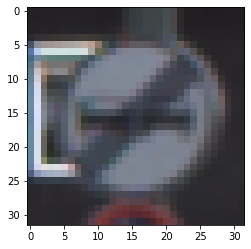

In [8]:
i=111
plt.imshow(x_train[i])
y_train[i]

14

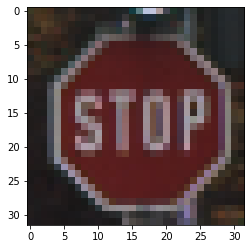

In [9]:
i=111
plt.imshow(x_test[i])
y_test[i]

31

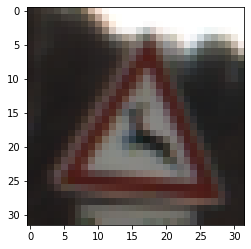

In [10]:
i=111
plt.imshow(x_validation[i])
y_validation[i]

# STEP 3: DATA PEPARATION

In [11]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train , y_train)

In [12]:
x_train_gray = np.sum(x_train/3, axis=3,keepdims =True)#converting colored image into grayscale
x_test_gray = np.sum(x_test/3, axis=3,keepdims =True)
x_validation_gray = np.sum(x_validation/3, axis=3,keepdims =True)

In [13]:
x_train_gray.shape

(34799, 32, 32, 1)

In [14]:
x_test_gray.shape

(12630, 32, 32, 1)

In [15]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [16]:
x_train_gray_norm = (x_train_gray  -128 )/128
x_test_gray_norm = (x_test_gray -128 )/128
x_validation_gray_norm  = (x_validation_gray -128 )/128

In [17]:
x_train_gray_norm

array([[[[ 0.125     ],
         [ 0.15364583],
         [ 0.17447917],
         ...,
         [ 0.22135417],
         [ 0.23177083],
         [ 0.265625  ]],

        [[-0.234375  ],
         [-0.0859375 ],
         [ 0.08333333],
         ...,
         [ 0.13802083],
         [ 0.18229167],
         [ 0.22135417]],

        [[-0.36458333],
         [-0.18489583],
         [-0.03385417],
         ...,
         [-0.0859375 ],
         [-0.0546875 ],
         [-0.04427083]],

        ...,

        [[ 0.15104167],
         [ 0.09635417],
         [ 0.0859375 ],
         ...,
         [ 0.14322917],
         [ 0.14583333],
         [ 0.14583333]],

        [[ 0.07552083],
         [ 0.0234375 ],
         [ 0.02864583],
         ...,
         [ 0.01822917],
         [ 0.0546875 ],
         [ 0.07552083]],

        [[ 0.04166667],
         [ 0.0078125 ],
         [-0.00520833],
         ...,
         [-0.08854167],
         [-0.046875  ],
         [ 0.00520833]]],


       [[[ 0.2578125 ],


In [18]:
x_train_gray[i].shape

(32, 32, 1)

In [19]:
x_train_gray[i].squeeze().shape# squueze to remove 1D entry from np array

(32, 32)

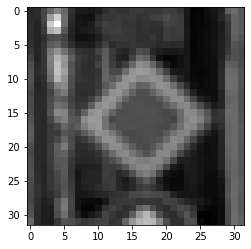

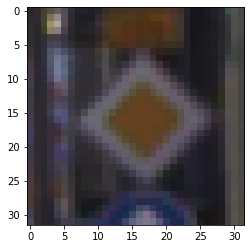

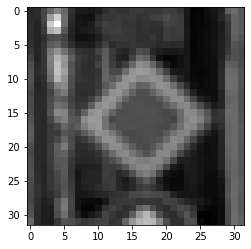

In [20]:
i=1324
plt.imshow(x_train_gray[i].squeeze(), cmap ='gray')
plt.figure()
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap ='gray')


# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [21]:
# Import train_test_split from scikit library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D ,MaxPooling2D ,AveragePooling2D , Dense , Flatten ,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [22]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())
cnn_model.add(Dense(units=120 , activation = 'relu'))
cnn_model.add(Dense(units=84 , activation = 'relu'))
cnn_model.add(Dense(units=143 , activation = 'softmax'))

In [23]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(lr=.001) , metrics =['accuracy'])

In [24]:
history = cnn_model.fit(x=x_train_gray_norm,y=y_train, batch_size=400 , epochs =20 , shuffle = True , verbose=1,
             validation_data = (x_validation_gray_norm , y_validation))

Epoch 1/20
87/87 [==============================] - 18s 191ms/step - loss: 4.1027 - accuracy: 0.0646 - val_loss: 3.0134 - val_accuracy: 0.2299
Epoch 2/20
87/87 [==============================] - 17s 190ms/step - loss: 2.3159 - accuracy: 0.3778 - val_loss: 1.6011 - val_accuracy: 0.5490
Epoch 3/20
87/87 [==============================] - 14s 159ms/step - loss: 1.1580 - accuracy: 0.6683 - val_loss: 1.0507 - val_accuracy: 0.6946
Epoch 4/20
87/87 [==============================] - 15s 174ms/step - loss: 0.7350 - accuracy: 0.7943 - val_loss: 0.8157 - val_accuracy: 0.7651
Epoch 5/20
87/87 [==============================] - 16s 187ms/step - loss: 0.5371 - accuracy: 0.8533 - val_loss: 0.7461 - val_accuracy: 0.7771
Epoch 6/20
87/87 [==============================] - 13s 150ms/step - loss: 0.4547 - accuracy: 0.8751 - val_loss: 0.6753 - val_accuracy: 0.7966
Epoch 7/20
87/87 [==============================] - 18s 211ms/step - loss: 0.3710 - accuracy: 0.9038 - val_loss: 0.6392 - val_accuracy: 0.8175

# STEP 5: MODEL EVALUATION

In [25]:
score = cnn_model.evaluate(x_test_gray_norm , y_test)
print("Test Accuracy : {}".format(score[1]))

395/395 [==============================] - 2s 5ms/step - loss: 0.9562 - accuracy: 0.8605
Test Accuracy : 0.8604909181594849


In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [27]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

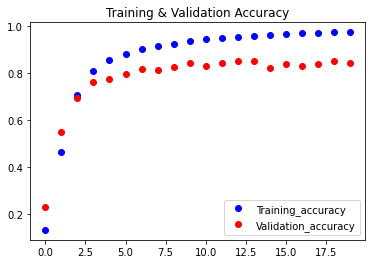

In [28]:
epochs = range(len(loss))
plt.plot(epochs , accuracy ,'bo', label= 'Training_accuracy')
plt.plot(epochs , val_accuracy ,'ro', label= 'Validation_accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

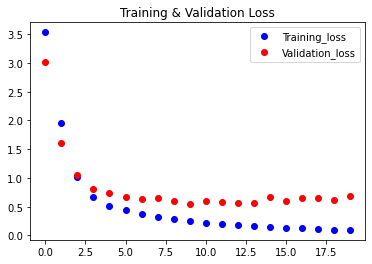

In [29]:
epochs = range(len(loss))
plt.plot(epochs , loss ,'bo', label= 'Training_loss')
plt.plot(epochs , val_loss ,'ro', label= 'Validation_loss')
plt.title('Training & Validation Loss')
plt.legend()

In [30]:
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true =  y_test

In [31]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm= confusion_matrix(y_true,predicted_classes)
print(cm)
print(accuracy_score(y_true,predicted_classes))

[[ 48  11   0 ...   0   0   0]
 [  5 641  53 ...   2   0   0]
 [  0  45 651 ...   0   0   0]
 ...
 [  0   0   2 ...  33   0   0]
 [  0   0   0 ...   0  42   0]
 [  0   0   0 ...   0   6  71]]
0.8604908946951703


<AxesSubplot:>

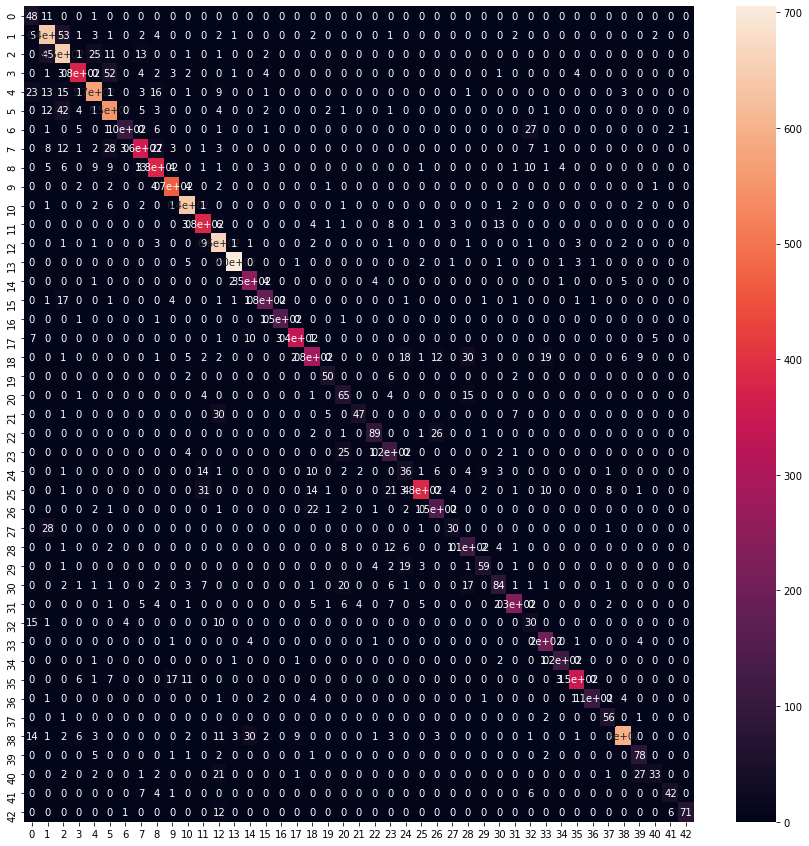

In [32]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm , annot=True)

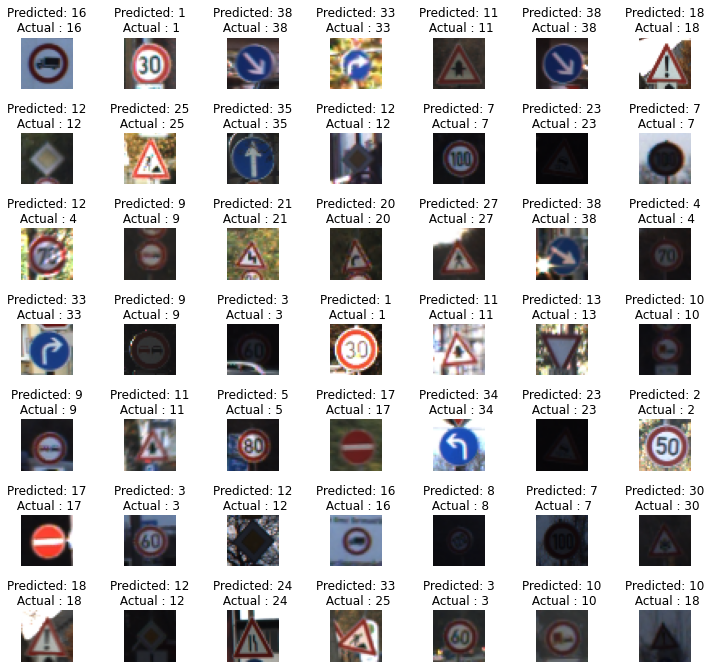

In [33]:
L = 7
W = 7
fig , axes = plt.subplots(L,W ,figsize=(12,12))
axes = axes.ravel()# to flatten the matrix i.e. will convert 15*15 matrix to 225 array

for i in np.arange(0,L*W):# np.arange will create an array from 0 to L*W
    axes[i].imshow(x_test[i])
    axes[i].set_title('Predicted: {}\n Actual : {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)

   

# GREAT JOB! NOW YOU'VE MASTERED CNNS TRAINING USING KERAS!